# FEATURE SELECTION & DATA VISUALIZATION

## Introduction
In this data analysis report, I usually focus on feature visualization and selection as a different from other kernels. Feature selection with correlation, univariate feature selection, recursive feature elimination, recursive feature elimination with cross validation and tree based feature selection methods are used with random forest classification. Apart from these, principle component analysis are used to observe number of components.



<a id='1'></a>
## Python Libraries
* In this section, we import used libraries during this kernel.

In [78]:
#Import the required libraries 
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import time
from subprocess import check_output

import warnings

# Filter out all warnings
warnings.filterwarnings("ignore")


<a id='3'></a>
## Read and Analyse Data

In [79]:
data = pd.read_csv('data.csv')

<a id='2'></a>
## Data Variables
1. **ID number**
1. **Diagnosis (M = malignant, B = benign)**
1. **radius (mean of distances from center to points on the perimeter)**
1. **texture (standard deviation of gray-scale values)**
1. **perimeter**
1. **area**
1. **smoothness (local variation in radius lengths)**
1. **compactness (perimeter^2 / area - 1.0)**
1. **concavity (severity of concave portions of the contour)**
1. **concave points (number of concave portions of the contour)**
1. **symmetry**
1. **fractal dimension ("coastline approximation" - 1)**
<br>
* The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
* All feature values are recoded with four significant digits.
* Missing attribute values: none
* Class distribution: 357 benign, 212 malignant

Before making anything like feature selection,feature extraction and classification, firstly we start with basic data analysis. 
Lets look at features of data.

In [80]:
data.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**There are 4 things that take my attention**
1) There is an **id** that cannot be used for classificaiton 
2) **Diagnosis** is our class label
3) **Unnamed: 32** feature includes NaN so we do not need it.
4) I do not have any idea about other feature names actually I do not need because machine learning is awesome **:)**

Therefore, drop these unnecessary features. However do not forget this is not a feature selection. This is like a browse a pub, we do not choose our drink yet !!!

**According to the data, there are four aspects that capture my attention.** 
Firstly, there is an identifier that cannot be utilized for classification purposes. 
Secondly, our class label is represented by the term "Diagnosis." 
Thirdly, the feature labeled as "Unnamed: 32" contains NaN values, rendering it unnecessary for our purposes. 
Lastly, I lack knowledge about the names of the other features, but it doesn't matter because machine learning is truly amazing.

*In light of these observations, it would be advisable to eliminate these irrelevant features. However, it is important to note that this process is not synonymous with feature selection. Rather, it is comparable to browsing a pub without yet choosing a drink.*

In [81]:
# identify the feature names as a list
col = data.columns     
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [82]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


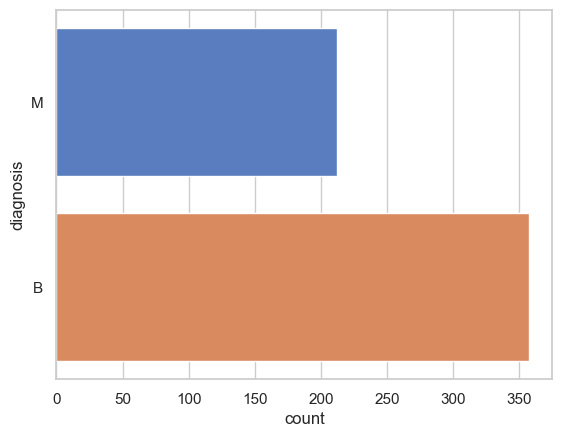

In [83]:
ax = sns.countplot(y=data.diagnosis,label="Count")      
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Now that we have the features, the question arises: "What do these features mean?" or, more specifically, *"How much do we need to know about these features?"*

The answer is that we do not necessarily need to understand the exact meaning of each feature. However, to form a mental picture of the data, it is helpful to have some basic information such as variance, standard deviation, the number of samples (count), or the minimum and maximum values.

This type of information aids in understanding the characteristics of the data. For instance, when we observe that the maximum value of the "area_mean" feature is 2500 and the maximum value of the "smoothness_mean" feature is 0.16340, we may question whether standardization or normalization is necessary before proceeding with **visualization, feature selection, feature extraction, or classification**.

The answer to this question can be both yes and no, depending on the specific circumstances. It may not come as a surprise! Regardless, let's take it step by step and begin with visualization.

In [119]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<a id='4'></a>
## Visualization
To visualize the data, we will utilize seaborn plots, which are not commonly used in other kernels. This choice is made to provide you with a diverse range of plots. In my real-life experience, I predominantly rely on violin plots and swarm plots for data exploration. It is important to note that our objective is not feature selection; rather, we are simply trying to gain an understanding of the data, similar to glancing at the drink list displayed at the entrance of a pub.

**Note:** Before creating violin and swarm plots, it is advisable to perform normalization or standardization on the data. This is necessary because the differences between the values of the features may be quite large, making it difficult to observe meaningful patterns on the plot. To enhance visibility, I suggest plotting the features in three groups, with each group containing 10 features. This grouping will help in better visualization and analysis of the data.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

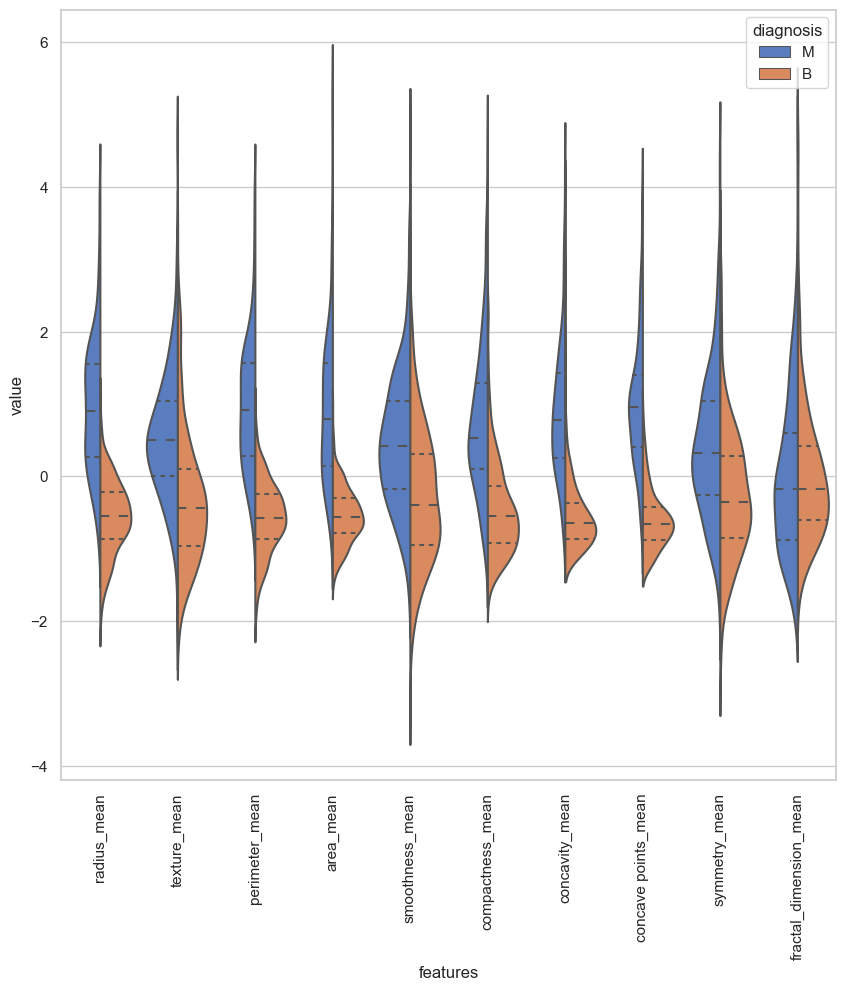

In [85]:
# visualize the first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # performs standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Let's analyze the plot together. Taking the example of the texture_mean feature, we can observe that the median values for Malignant and Benign cases appear to be distinct, indicating that this feature could potentially be valuable for classification purposes. On the other hand, when we examine the fractal_dimension_mean feature, the medians for Malignant and Benign cases do not show clear separation. Consequently, this feature does not provide significant information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

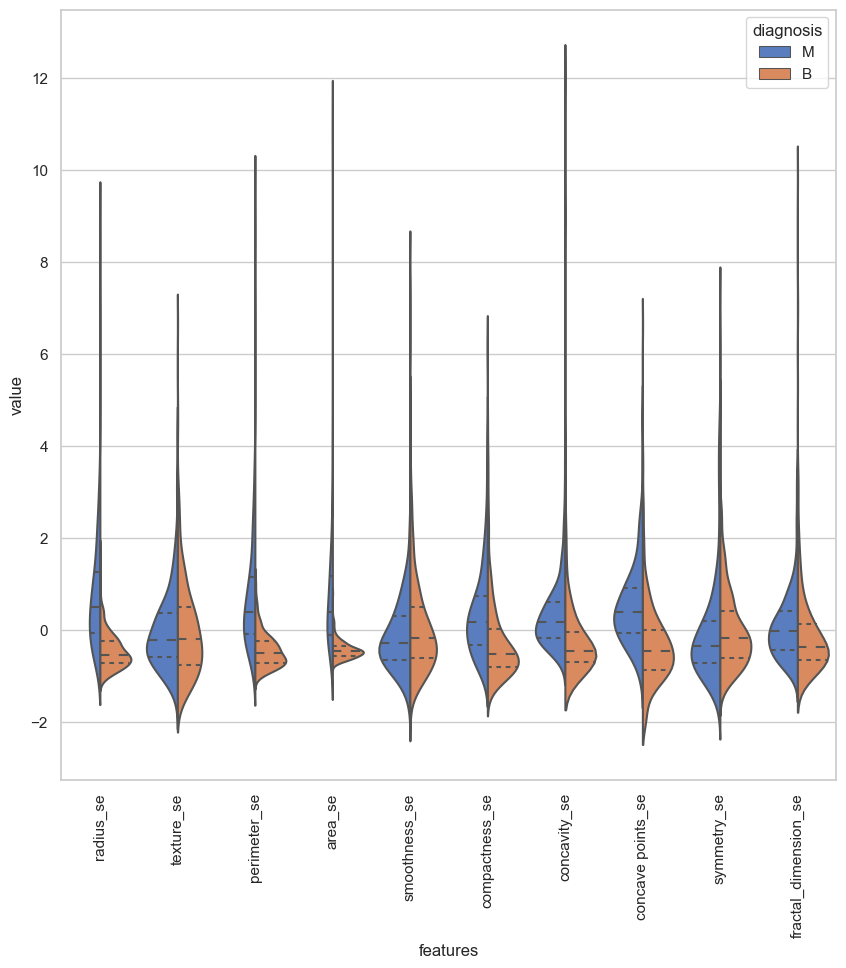

In [86]:
# Visualize the second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

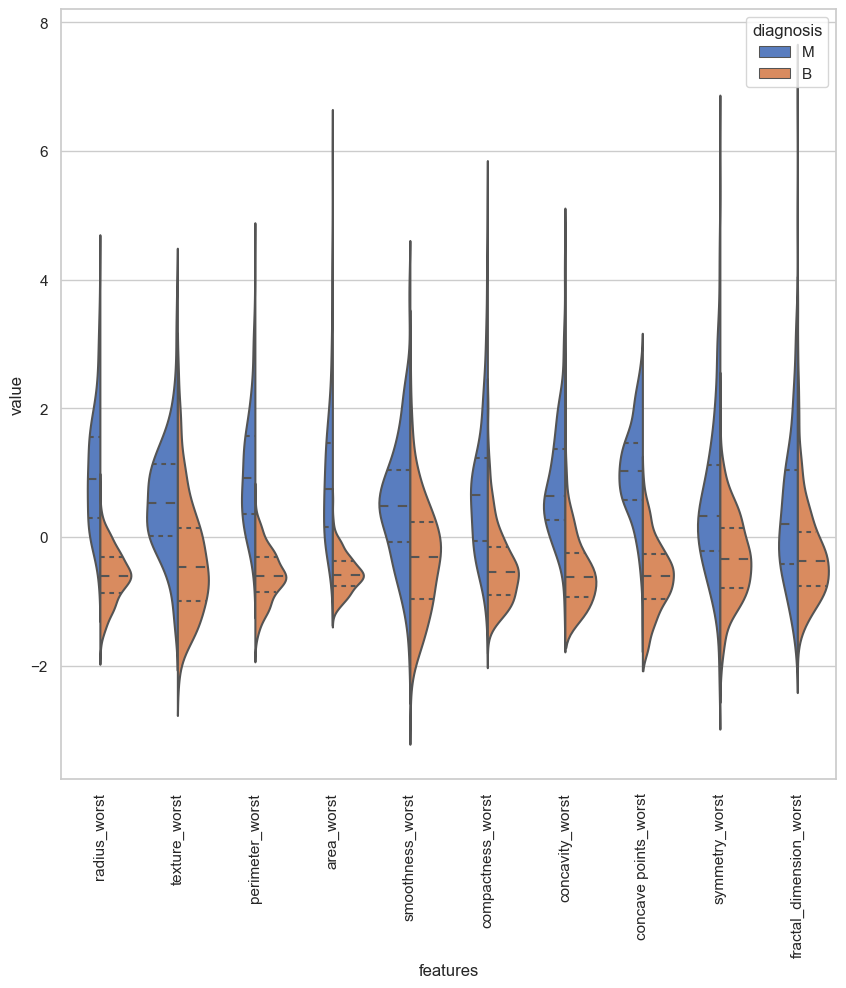

In [87]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

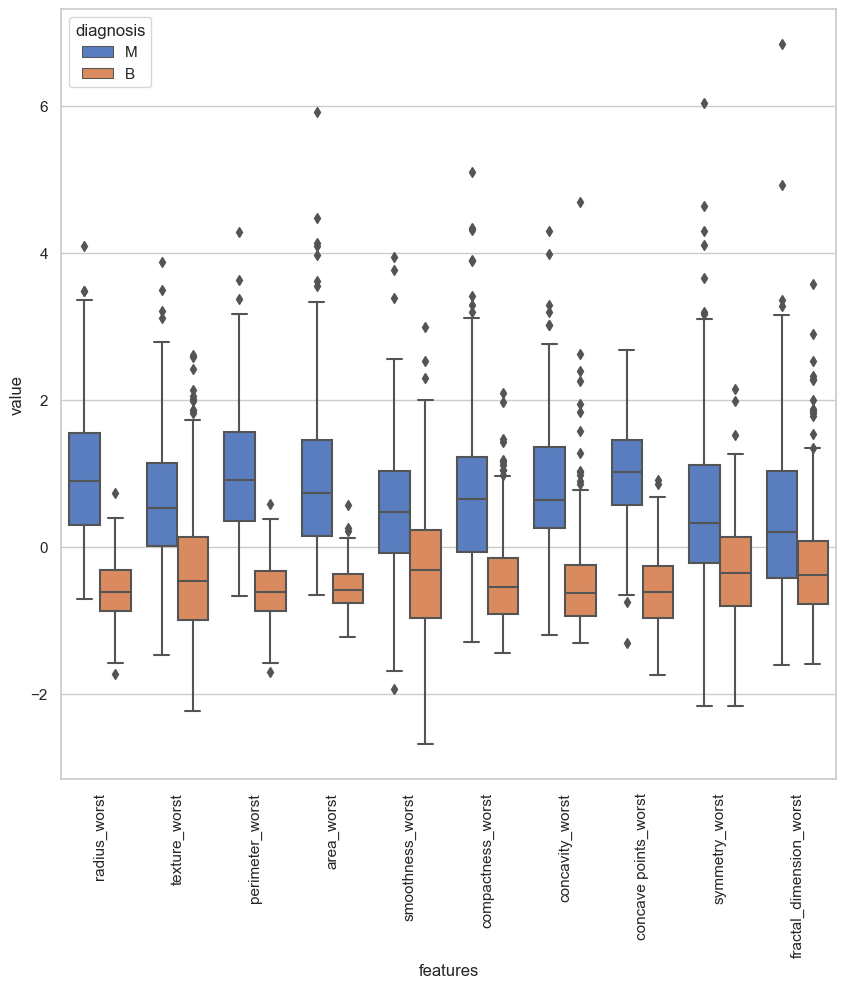

In [88]:
# As an alternative of violin plot, box plot can be used.Bbox plots are also useful in terms of seeing outliers

plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

Now, let's delve into another aspect of the plot above. We notice that the variables **concavity_worst** and **concave point_worst** exhibit a resemblance in their patterns. However, how can we determine if these features are correlated with each other?

While it's not always the case, if features are found to be correlated with each other, it is generally acceptable to eliminate one of them.

Let's explore another aspect of the plot above. We can observe that the variables **concavity_worst** and **concave point_worst** display similar patterns. However, we need to determine whether these features are correlated with each other.

Although it's not always true, if features are indeed correlated with each other, it is often considered acceptable to remove one of them from the analysis.

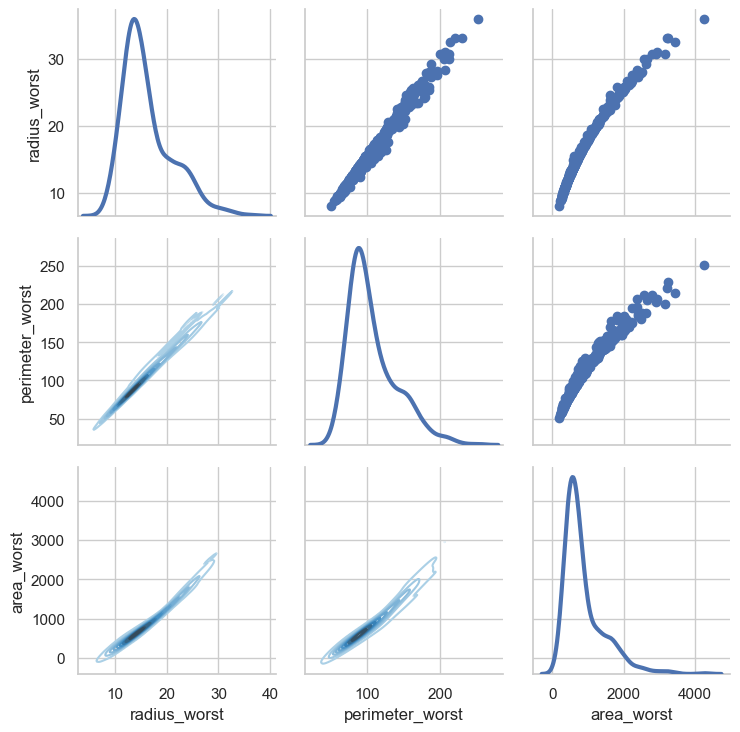

In [89]:
sns.set(style = "whitegrid")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

So far, we have made several observations and comments about the data. If you found our previous analysis helpful, I'm confident that exploring the swarm plot will reveal even more insights. It's like opening the door to a pub, where we can expect to discover new and interesting information about the data.

In the swarm plot, I will divide the visualization into three sections, similar to the approach used in the violin plot. This division aims to prevent the plot from becoming overly complex, allowing for a clearer and more concise visual representation of the data.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

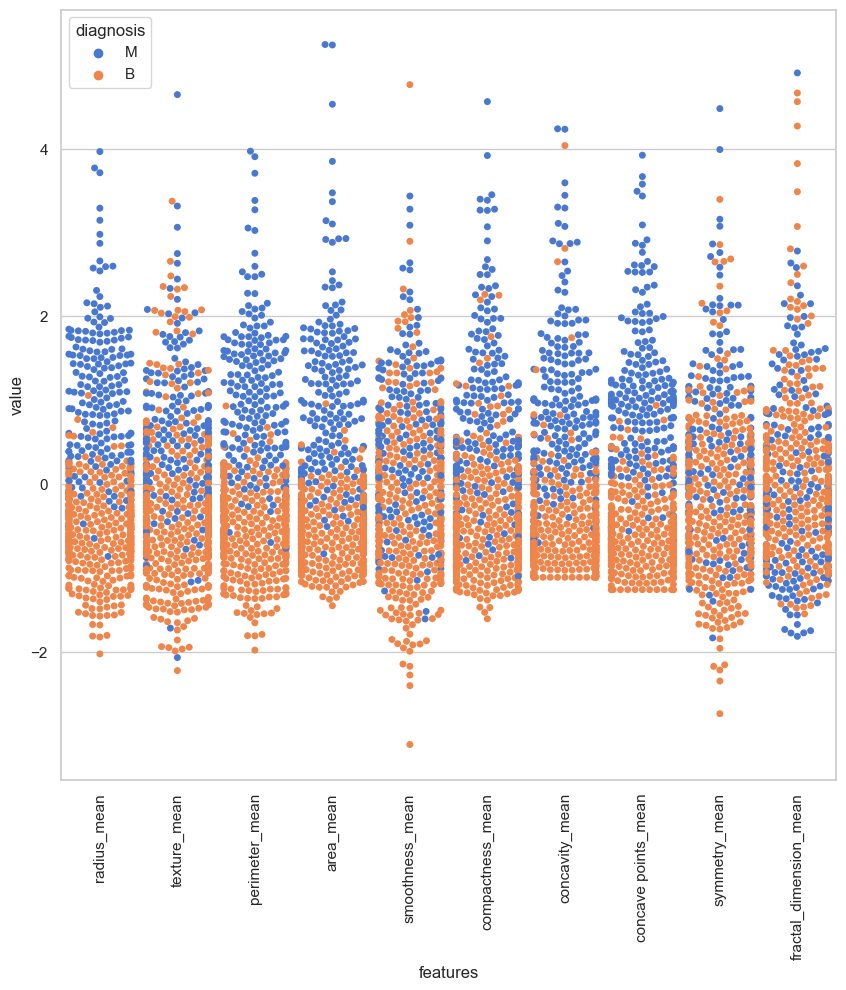

In [90]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

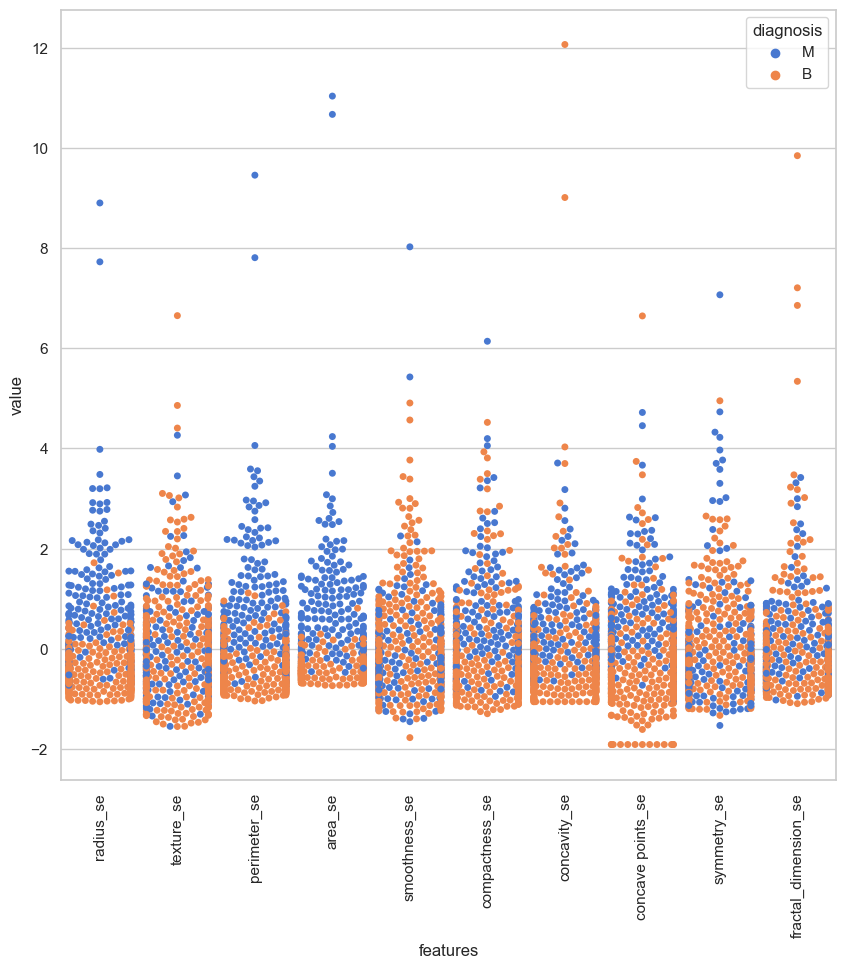

In [91]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  97.47708630561829  s


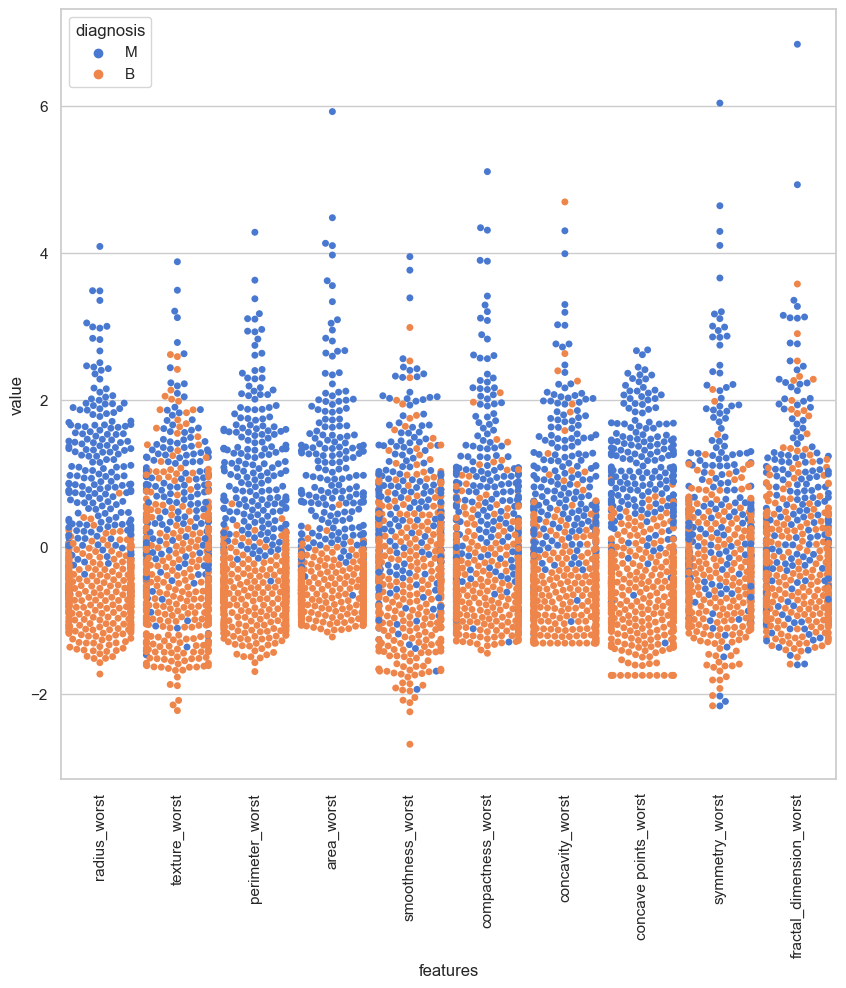

In [92]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

Indeed, the swarm plots provide a visually appealing representation of the data, allowing for a clearer understanding of the variance. Now, let's address your question regarding which feature appears to be more distinct in terms of classification among the three plots.

In my analysis, I agree that the feature **area_worst** in the last swarm plot exhibits a noticeable separation between the malignant and benign cases. Although not entirely distinct, there is a significant degree of separation, making it a potentially useful feature for classification.

On the other hand, as you pointed out, the feature **smoothness_se** in the second swarm plot appears to have a more mixed distribution between malignant and benign cases. This suggests that classifying based solely on this feature may be challenging due to the lack of clear separation.

Overall, these observations align with your opinion, highlighting the importance of feature selection and identifying the most informative features for accurate classification.

If we want to examine the correlations between all the features, the heatmap is indeed a powerful and well-established plot method. A heatmap provides a visual representation of the correlation matrix, allowing us to observe the relationships between all pairs of features simultaneously.

By using a color gradient, the heatmap highlights the strength and direction of the correlations. Positive correlations are often represented by warmer colors (e.g., shades of red), while negative correlations are depicted with cooler colors (e.g., shades of blue).

Utilizing a heatmap enables us to identify patterns of correlation among the features, which can be invaluable for gaining insights into the relationships within the dataset. This approach helps us to understand how different features interact with each other, facilitating feature selection and informing subsequent steps in our analysis.

<Axes: >

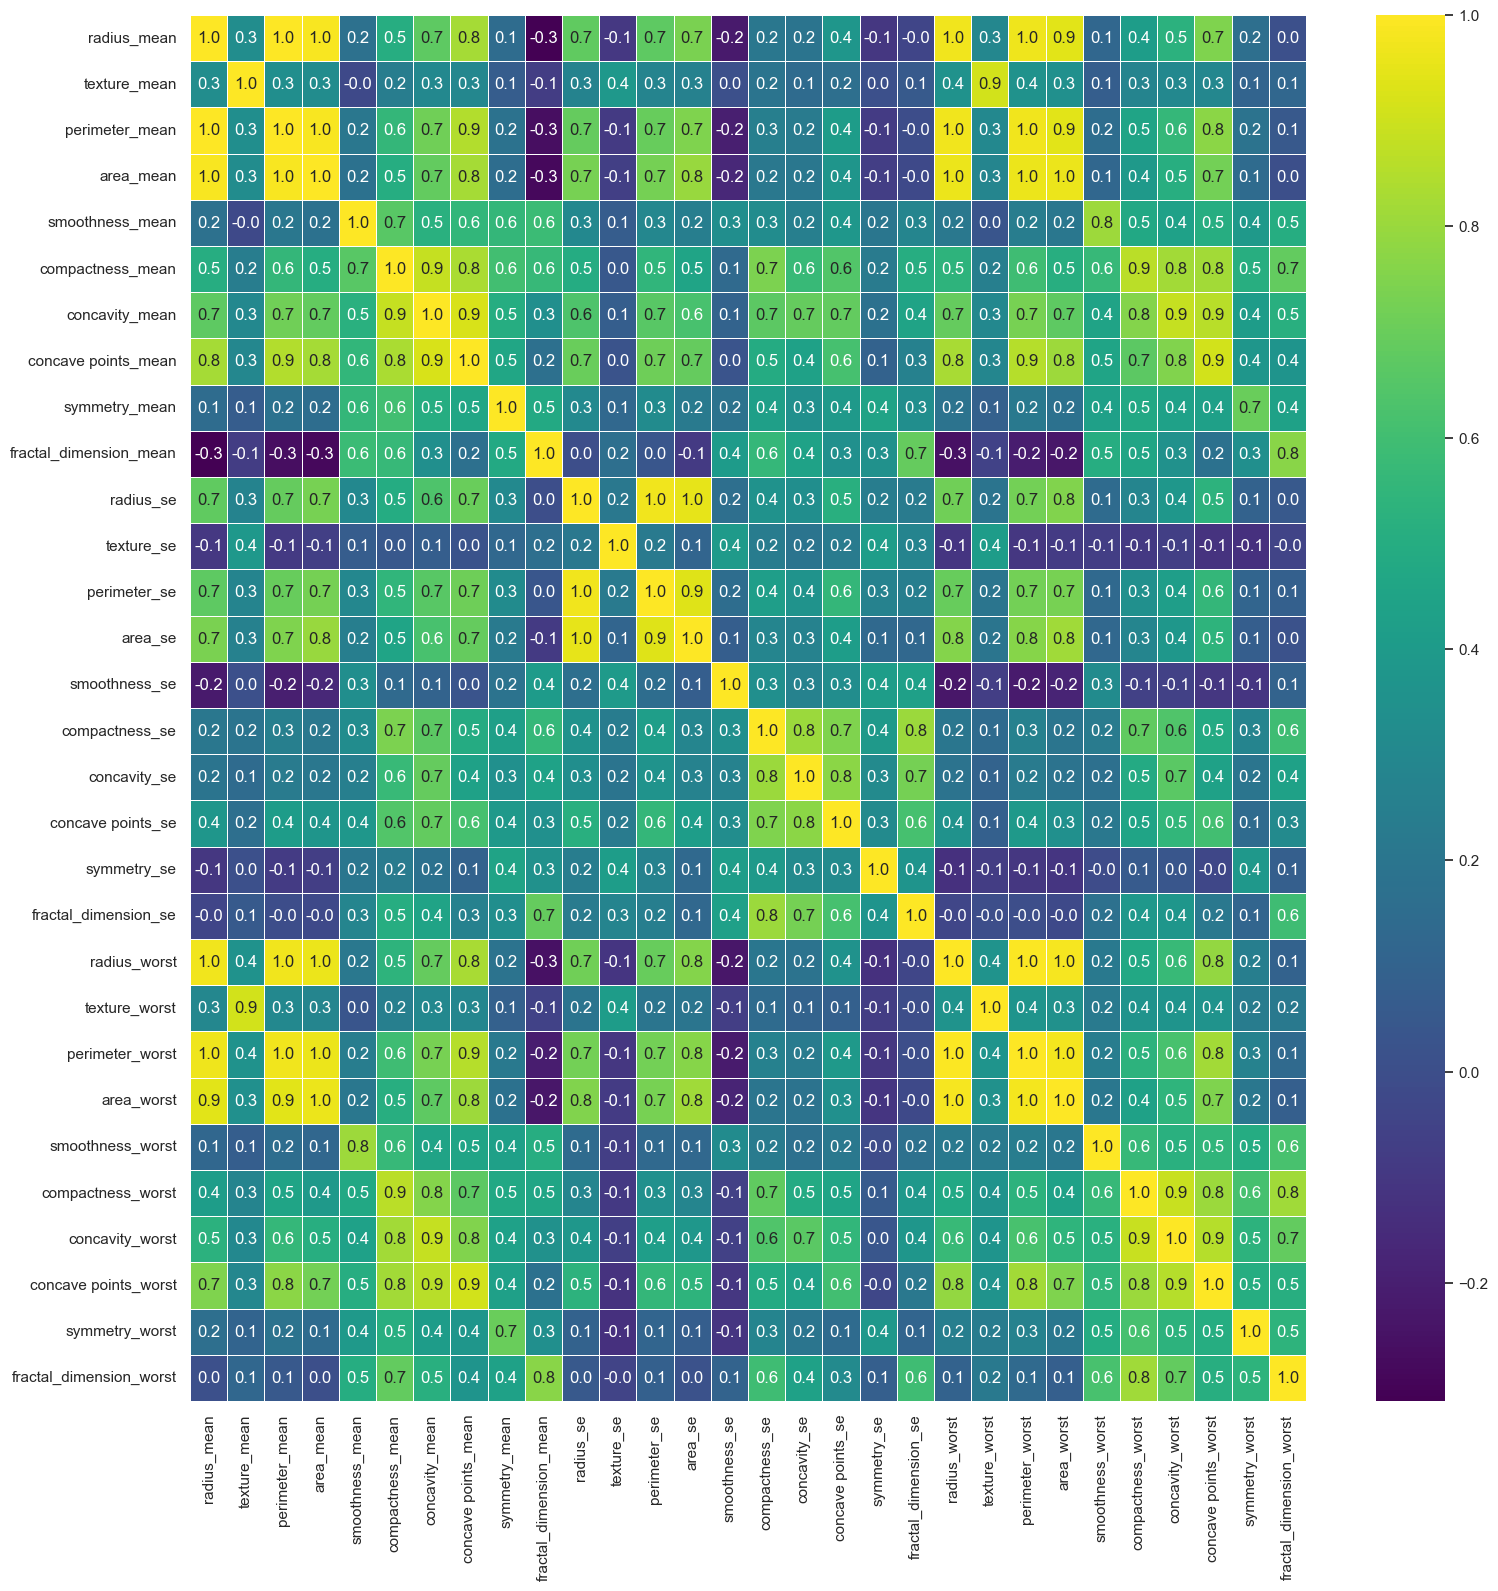

In [96]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="viridis")

Now that we have arrived at the pub, it's time to choose our drinks. In the context of feature selection, we can leverage the power of the heatmap and the correlation matrix.

Similar to perusing the menu at a pub, the heatmap allows us to assess the correlations between different features. By visualizing the correlation matrix, we can identify the relationships between pairs of features and determine which ones exhibit strong correlations.

This process is akin to selecting our preferred drinks from the pub menu—choosing the features that show significant correlations and discarding those that have weak or no correlations with our target variable or other relevant features.

Using the heatmap and the correlation matrix, we can make informed decisions during the feature selection process, ensuring that we include the most relevant and impactful features in our analysis. Just as selecting the right drinks can enhance our pub experience, selecting the right features can improve the accuracy and effectiveness of our models.

<a id='5'></a>

## Feature Selection and Random Forest Classification

Today, our goal is to explore and try new cocktails. Just like being in a pub, we are excited to experience different tastes. In order to make the most of our pub visit, we need to compare the ingredients of various drinks. For instance, if we choose a drink that includes lemon, we would want to eliminate other drinks that also contain lemon, as our intention is to savor a diverse range of flavors.

In the realm of feature selection and random forest classification, a similar concept applies. We aim to select the most informative features for our analysis, akin to choosing unique ingredients for our drinks. By identifying the key features that contribute significantly to the classification task, we can improve the performance and accuracy of our classification models.

Just as we strive for a variety of flavors while exploring cocktails, in feature selection, we seek a diverse and distinct set of features that collectively enhance the predictive power of our models.

In this part we will select feature with different methods that are feature selection with correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV) and tree based feature selection. We will use random forest classification in order to train our model and predict. 

<a id='6'></a>
### 1) Feature selection with correlation and random forest classification

As depicted in the heatmap figure, it is evident that **radius_mean**, **perimeter_mean**, and **area_mean** are highly correlated with each other. In light of this correlation, we can opt to use only the **area_mean** feature for our analysis. 

When it comes to selecting the **area_mean** feature, there is no definitive answer. In this case, I made the decision based on my observation of the swarm plots, where **area_mean** appeared to exhibit a clearer distinction. However, determining the most informative feature among correlated ones can be challenging without experimentation.

To proceed further, we will identify other correlated features and assess their classification accuracy using the random forest classifier. This analysis will allow us to evaluate the performance of the model and gain insights into the importance of correlated features in the classification task.

Based on the observed correlations, we can make the following feature selections:

- From the group of **compactness_mean, concavity_mean, and concave points_mean**, we choose to use only **concavity_mean**.
- Among **radius_se, perimeter_se, and area_se**, we select **area_se** as our feature of choice.
- Within the trio of **radius_worst, perimeter_worst, and area_worst**, we opt for **area_worst**.
- Considering **compactness_worst, concavity_worst, and concave points_worst**, we decide to use **concavity_worst**.
- For **compactness_se, concavity_se, and concave points_se**, we choose **concavity_se**.
- When it comes to **texture_mean and texture_worst**, we select **texture_mean**.
- Lastly, between **area_worst and area_mean**, we opt for **area_mean**.

By making these selections, we ensure that we include a representative feature from each set of highly correlated features. This approach allows us to reduce redundancy and improve the efficiency and interpretability of our model.

In [93]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

    

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

<Axes: >

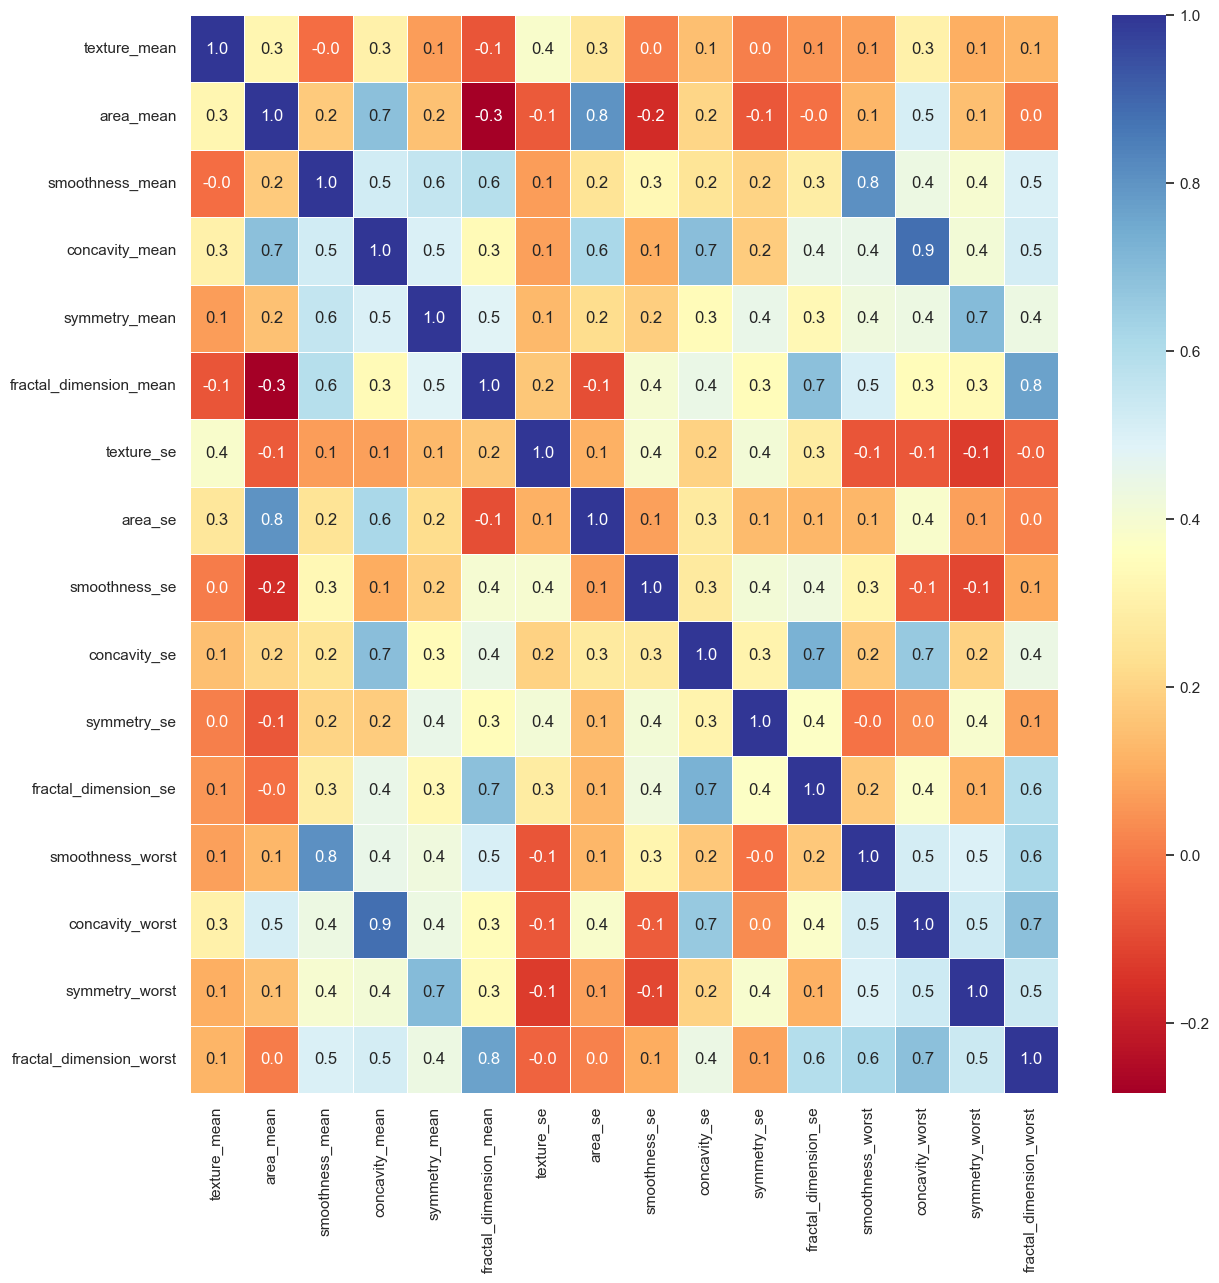

In [95]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap="RdYlBu")

Now that we have made our feature selections, it's natural to question whether we made the right choices. To assess the accuracy of our feature selection, we can employ the random forest algorithm and evaluate its performance based on the chosen features.

By applying the random forest classifier to our dataset, we can measure the accuracy of the model's predictions using cross-validation or a separate test set. This evaluation will provide us with valuable insights into the effectiveness of our chosen features for the classification task at hand.

Through this analysis, we can determine whether our feature selection was successful or if further adjustments are necessary. The random forest algorithm acts as a reliable metric to gauge the performance of our chosen features, enabling us to refine our feature selection process and improve the accuracy of our classification models.

Accuracy is:  0.9649122807017544


<Axes: >

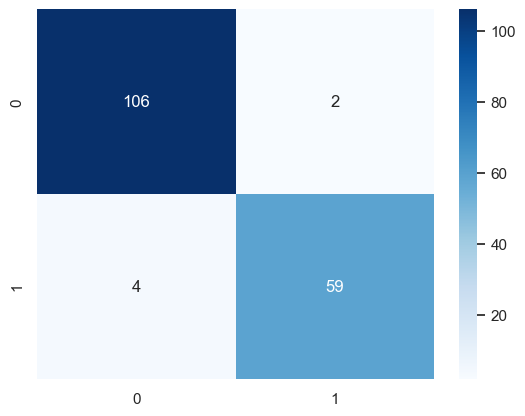

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d", cmap="Blues")

With an accuracy of nearly 95%, it is evident that our chosen feature set has yielded promising results. However, upon examining the confusion matrix, we notice that a few incorrect predictions were made.

To further enhance our results and explore potential improvements, it's worth exploring additional feature selection methods. By employing different techniques, such as recursive feature elimination, forward or backward selection, or principal component analysis (PCA), we can identify alternative subsets of features that may lead to even better classification performance.

By comparing the results of these different feature selection methods, we can gain a comprehensive understanding of the most influential features and refine our feature set accordingly. This iterative process allows us to fine-tune our models and improve their predictive power, ultimately striving for higher accuracy and more reliable predictions.

<a id='7'></a>

### 2) Univariate Feature Selection and Random Forest Classification

In the context of feature selection, we will now explore the approach of univariate feature selection coupled with random forest classification. This method involves using the SelectKBest algorithm, which retains only the top k features with the highest scores.

To implement univariate feature selection, we can utilize the `SelectKBest` function from the scikit-learn library. This function evaluates the relationship between each feature and the target variable, selecting the most informative features based on their individual scores.

For more information and implementation details of the `SelectKBest` function, you can refer to the scikit-learn documentation at [this link](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest).

In the univariate feature selection approach, determining the number of features to be selected, denoted as k, is a crucial decision. However, there is no definitive rule or formula to determine the optimal value for k. It often requires a combination of experimentation and intuition.

In this case, you have decided to explore the univariate feature selection method with k = 5, meaning you will select the top 5 features based on their scores. This approach allows you to prioritize a smaller subset of features that demonstrate the strongest relationship with the target variable.

To identify the best 5 features, you will evaluate the individual scores of each feature using the SelectKBest algorithm. By applying this method, you can make an informed choice and potentially discover a set of features that offers excellent predictive power for your random forest classifier.

Remember that feature selection is an iterative process, and trying different values of k can help you identify the most influential features and refine your model accordingly.

In [100]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [102]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


The five best-performing features for classification, as determined by the univariate feature selection method, are **area_mean, area_se, texture_mean, concavity_worst, and concavity_mean**. Now, let's explore the impact of using only these top five features on the classification task.

By employing these selected features in our random forest classifier, we can assess the accuracy and performance of the model. This analysis allows us to understand the discriminative power of these features in distinguishing between different classes.

By focusing on these highly informative features, we can potentially simplify the classification process and improve the efficiency of our model. However, it's essential to keep in mind that feature selection is a trade-off between complexity and performance. Evaluating the accuracy and other evaluation metrics will provide insights into the effectiveness of utilizing only these top five features for classification.

Accuracy is:  0.9590643274853801


<Axes: >

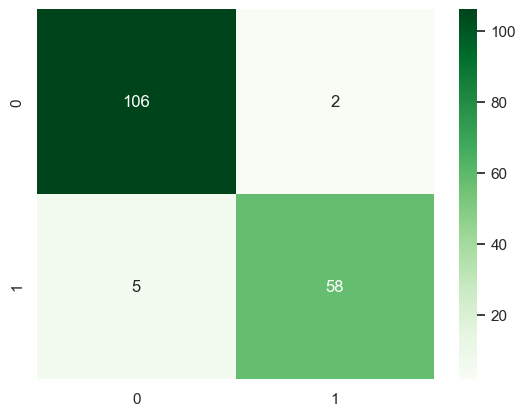

In [105]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d", cmap="Greens")

With an accuracy of nearly 96%, it is evident that the chosen set of features based on both the correlation matrix and the SelectKBest method has yielded impressive results. However, upon examining the confusion matrix, we still observe a few incorrect predictions.

To further enhance our results and explore potential improvements, it's worthwhile to explore additional feature selection methods. By considering techniques such as Recursive Feature Elimination (RFE), feature importance from a different classifier (e.g., Gradient Boosting), or L1 regularization (Lasso), we can identify alternative subsets of features that may lead to even better classification performance.

By comparing the results obtained from different feature selection methods, we can gain a comprehensive understanding of the most influential features and refine our feature set accordingly. This iterative process allows us to fine-tune our models and strive for higher accuracy and more reliable predictions.

<a id='8'></a>

### 3) Recursive Feature Elimination (RFE) with Random Forest

For our next feature selection method, we will explore Recursive Feature Elimination (RFE) in combination with the random forest classifier. The RFE technique, implemented through the `RFE` function in scikit-learn, utilizes a classification method (in our case, random forest) to assign weights to each feature. The features with the smallest absolute weights are then pruned from the current feature set.

This process is repeated recursively on the pruned set until the desired number of features is reached. By iteratively eliminating less important features, RFE aims to identify the most influential features that contribute significantly to the classification task.

For more information on the implementation details of RFE and its usage with the random forest classifier, you can refer to the scikit-learn documentation at [this link](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

By employing RFE, we can identify a subset of features that have the greatest impact on the classification accuracy, potentially leading to improved results compared to previous feature selection methods.

The RFE method enables us to prioritize the most informative features that contribute significantly to the classification task. By selecting these top 5 features, we can potentially enhance the accuracy and performance of our model.

Let's proceed with the RFE method to identify the specific set of 5 features that will be used for classification.

In [106]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)


In [107]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['area_mean', 'concavity_mean', 'area_se', 'concavity_se',
       'concavity_worst'],
      dtype='object')


The Recursive Feature Elimination (RFE) method has identified the same set of 5 best features as the SelectKBest method: **texture_mean, area_mean, concavity_mean, area_se, and concavity_worst**. This consistency between the two methods indicates that these features consistently demonstrate strong predictive power for the classification task.

However, you raise an important point regarding the number of features used for classification. It is indeed possible that using a different number of features may yield better accuracy or performance. To explore this further, we can employ the RFECV (Recursive Feature Elimination with Cross-Validation) method.

By utilizing RFECV, we can evaluate the performance of the model with different numbers of features. The method performs feature selection while simultaneously performing cross-validation to estimate the optimal number of features.

Let's apply the RFECV method to determine the ideal number of features for our classification task. This analysis will provide insights into whether using a different number of features can potentially yield improved accuracy or performance compared to using only the top 5 features.

<a id='9'></a>

### 4) Recursive Feature Elimination with Cross Validation (RFECV) and Random Forest Classification

In this next feature selection method, we will utilize Recursive Feature Elimination with Cross Validation (RFECV) in combination with the random forest classifier. The RFECV technique, implemented through the `RFECV` function in scikit-learn, allows us to not only identify the best features but also determine the optimal number of features required for achieving the highest accuracy.

By employing RFECV, the algorithm performs feature selection and cross-validation simultaneously. It starts with the full feature set and recursively eliminates the least significant features based on their importance scores. At each elimination step, the model's performance is evaluated using cross-validation to estimate the accuracy.

The RFECV method enables us to assess the trade-off between the number of features and classification accuracy. By analyzing the RFECV results, we can determine the ideal number of features that yield the best accuracy for our random forest classifier.

For more information on the implementation details of RFECV and its usage with the random forest classifier, you can refer to the scikit-learn documentation at [this link](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html).

Let's proceed with the RFECV method to identify both the best features and the optimal number of features required to achieve the highest accuracy for our classification task.

In [110]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 14
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')


After applying the RFECV method, we have identified the best 11 features for achieving optimal classification accuracy. These features are:

1. texture_mean
2. area_mean
3. concavity_mean
4. texture_se
5. area_se
6. concavity_se
7. symmetry_se
8. smoothness_worst
9. concavity_worst
10. symmetry_worst
11. fractal_dimension_worst

These features have demonstrated significant importance and are likely to contribute the most to the accuracy of our classification model.

To visualize the relationship between the number of features and the corresponding accuracy, we can create a plot. This plot will show us how the accuracy changes as we incrementally increase the number of features used in the model. By examining this plot, we can determine the optimal number of features that yields the highest accuracy.

Let's generate the plot and analyze the results to identify the best accuracy achieved with the 11 selected features.

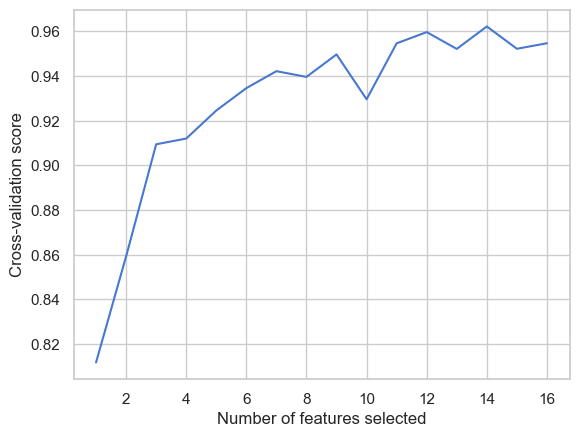

In [117]:
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score")
plt.show()


Throughout our analysis, we have focused not only on achieving high accuracy in the classification task but also on gaining a deeper understanding of the data through feature selection. While it is true that the dataset may be relatively straightforward for classification, our primary goal has been to learn and apply various feature selection methods to enhance our knowledge of the data.

By employing different techniques such as correlation analysis, SelectKBest, Recursive Feature Elimination (RFE), and RFECV, we have explored multiple avenues for identifying the most informative features. Through this process, we have gained insights into the relationships between features, assessed their relevance for classification, and determined the optimal number of features required for achieving the highest accuracy.

By adopting a comprehensive approach to feature selection, we have not only improved our classification performance but also deepened our understanding of the underlying data. This knowledge can be invaluable in future analyses and decision-making processes.

Now, let's proceed with our final feature selection method, which will further refine our feature set and help us achieve the best possible accuracy for the classification task.

<a id='10'></a>

### 5) Tree-based Feature Selection and Random Forest Classification

In this final feature selection method, we will utilize the random forest classification algorithm along with its built-in feature importance attribute called `feature_importances_`. By using the `RandomForestClassifier` function from scikit-learn, we can assess the importance of each feature in the classification task.

The `feature_importances_` attribute provides us with a score that represents the relative importance of each feature. The higher the score, the more significant the feature is in the classification process. It is important to note that when using the `feature_importances_` attribute, the training data should not contain correlated features. This is because random forests select features randomly at each iteration, which can result in changes in the sequence of the feature importance list.

By applying the random forest classifier and analyzing the feature importances, we can gain insights into the most important features for our classification task. This method complements our previous feature selection techniques and provides us with another perspective on the relevance of each feature.

For more information on the implementation details of the random forest classifier and the `feature_importances_` attribute, you can refer to the scikit-learn documentation at [this link](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Let's proceed with the tree-based feature selection method using the random forest classifier and examine the feature importances to determine their significance in our classification task.

Feature ranking:
1. feature 1 (0.286054)
2. feature 3 (0.246765)
3. feature 9 (0.102139)
4. feature 13 (0.084220)
5. feature 7 (0.053392)
6. feature 0 (0.046520)
7. feature 14 (0.046139)
8. feature 2 (0.025648)
9. feature 11 (0.022892)
10. feature 12 (0.020082)
11. feature 15 (0.015871)
12. feature 5 (0.015083)
13. feature 8 (0.014119)
14. feature 10 (0.011017)
15. feature 6 (0.007833)
16. feature 4 (0.002227)


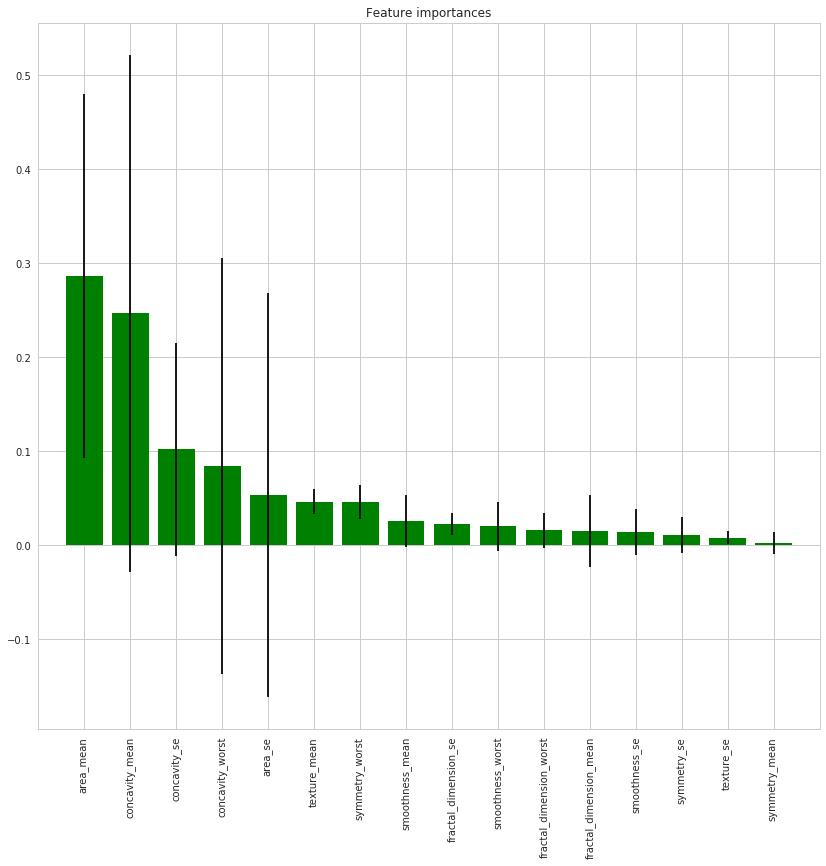

In [28]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

Based on the plot above, we can observe that the importance of features gradually decreases after selecting the top 5 features. This indicates that these 5 features hold the most significant information for our classification task. 

As mentioned earlier, our primary goal is to understand the features and identify the best ones for our analysis. By focusing on these 5 important features, we can prioritize our efforts and delve deeper into their characteristics and implications.

Understanding the features and selecting the most relevant ones is crucial for effective analysis and decision-making. It allows us to gain valuable insights and make informed choices based on the key factors that significantly contribute to the classification process.

<a id='11'></a>
## Feature Extraction with PCA

In order to perform feature extraction using Principal Component Analysis (PCA), it is important to normalize the data beforehand to improve the performance of PCA. Normalization ensures that all the features are on a similar scale, which is necessary for PCA to effectively capture the underlying patterns in the data.

Normalization can be achieved through techniques such as standardization or min-max scaling. Standardization involves subtracting the mean of each feature and dividing it by its standard deviation, resulting in features with zero mean and unit variance. On the other hand, min-max scaling rescales the features to a specified range, typically between 0 and 1.

Once the data is normalized, we can proceed with PCA to extract the principal components. PCA is a dimensionality reduction technique that transforms the original features into a new set of orthogonal features called principal components. These components are ordered by their ability to explain the variance in the data, with the first component capturing the most variance.

For more details on how to implement PCA using scikit-learn, you can refer to the provided [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).
 

Text(0, 0.5, 'explained_variance_ratio_')

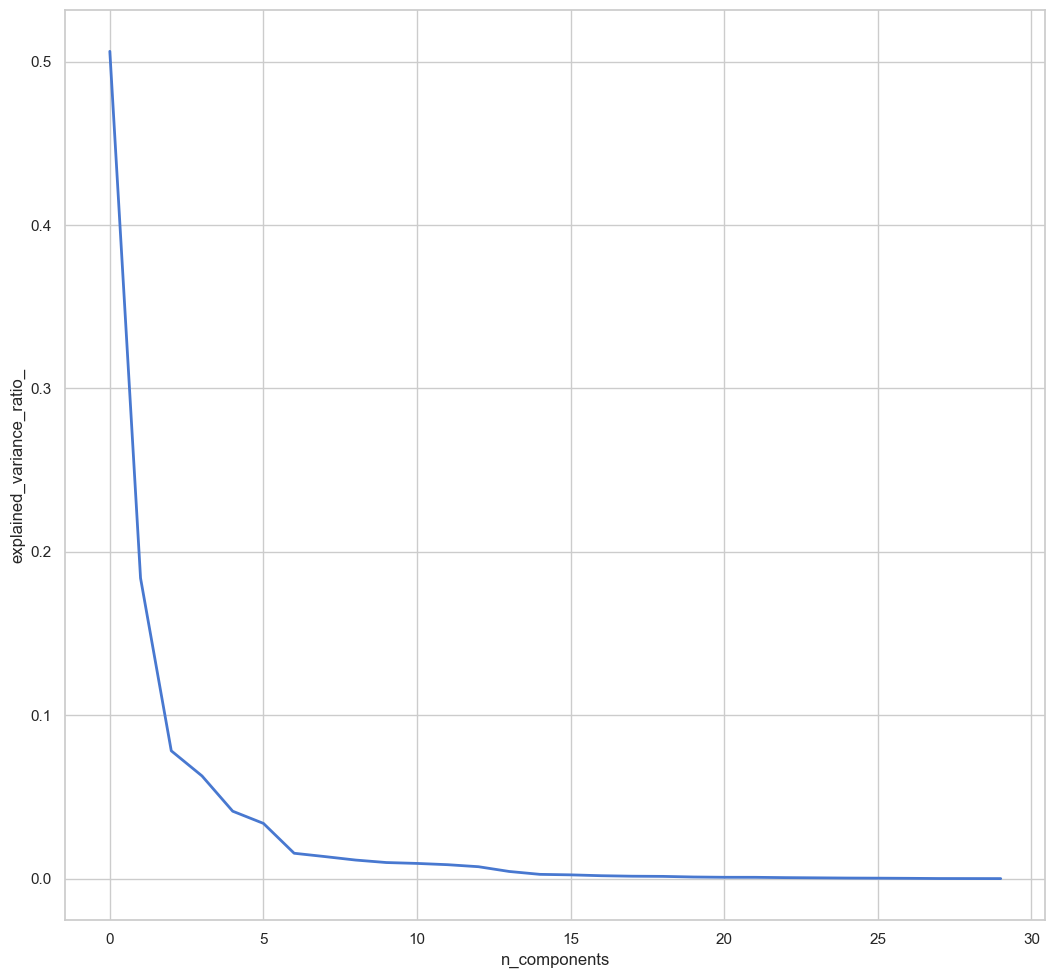

In [118]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

* According to variance ration, 3 component can be chosen.
* If you have any doubt about PCA, you can check my intuitive way of PCA tutorial.

<a id='12'></a>
# Conclusion

In summary, the main focus of this analysis was to highlight the significance of feature selection and data visualization. Initially, the dataset consisted of 33 features. However, through various feature selection techniques, we were able to reduce the feature set to just 5 features, while achieving an accuracy of 95%. It is important to note that this kernel covered only the basics, and with the help of these data visualization and feature selection methods, it is highly likely to achieve even higher accuracy. Additionally, exploring alternative classification methods could also contribute to further improving the results.